# Riley i

Goal is to make something along the lines of Bridget Riley's *First Study for Fleeting Moment*.

With a diagonal grid with colours rythms forming various patterns across it.

That'll make a good spring board for starting to mess with alternative pattern formations, and generated color schemes, but for just aiming to get a basic representation.

In [1]:
import shades
import random

In [2]:
pallete = [
    (33, 80, 169), # blue
    (90, 126, 165), # light blue
    (68, 163, 81), # green
    (255, 199, 52), # yellow
    (219, 207, 177), # beige
    (189, 189, 186), # grey
    (232, 99, 98), # pink
]

First off, let's create a diagonal grid, with randomly chosen shades from our pallete

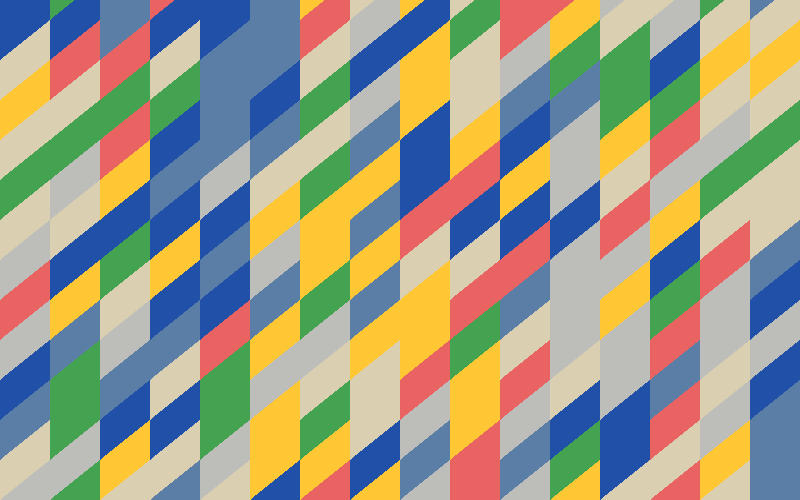

In [3]:
# ok, let's start just by recreating the diagonal grid with random shades
canvas = shades.Canvas(500, 800)
ink = shades.BlockColor()

grid_width = 50
grid_height = 40
grid_offset = 20

for x in range(-grid_width, canvas.width+grid_width, grid_width):
    for y in range(-grid_height, canvas.height+grid_height, grid_height):
        ink.color = random.choice(pallete)
        ink.shape(
            canvas,
            [(x, y + grid_offset),
            (x + grid_width, y - grid_offset),
            (x + grid_width, y + grid_height - grid_offset),
            (x, y + grid_height + grid_offset)],
        )

canvas

Now let's introduce some pattern, namely:
- Blocks of alternating colors
- Blocks of single colours

In [4]:
def pick_two_colors(pallete) -> list:
    """
    Function returns list of two colours from pallete
    """
    # lets make sure we return a single block fairly often
    if random.random() < 0.25:
        color = random.choice(pallete)
        return [color, color]
    return [
        random.choice(pallete),
        random.choice(pallete),
    ]

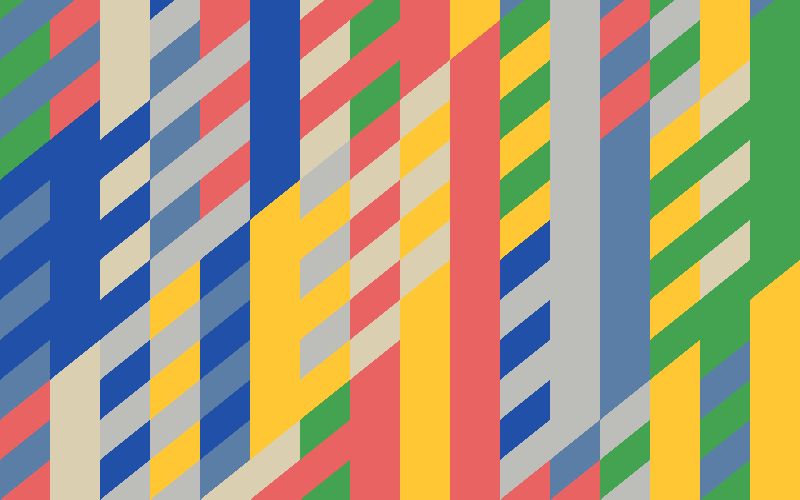

In [5]:
canvas = shades.Canvas(500, 800)
ink = shades.BlockColor()

grid_width = 50
grid_height = 40
grid_offset = 20
block_size = 6


for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
    for i, y in enumerate(range(-grid_height, canvas.height+grid_height, grid_height)):
        if (i + j) % block_size == 0:
            two_colors = pick_two_colors(pallete)
        ink.color = two_colors[i % 2]
        ink.shape(
            canvas,
            [(x, y + grid_offset),
            (x + grid_width, y - grid_offset),
            (x + grid_width, y + grid_height - grid_offset),
            (x, y + grid_height + grid_offset)],
        )

canvas

For the final variation here, we'll introduce much more variation around the output:
- Weighted choice of colours from the pallette to give image more tonal character
- Randomly selected grid width, height, and offset

In [6]:
def pick_two_colors(pallete: list, pallete_weights: list) -> list:
    """
    Pick two colors in line with weights given
    """
    if random.random() < 0.25:
        color = random.choices(pallete, weights=pallete_weights)[0]
        return [color, color]
    return random.choices(pallete, weights=pallete_weights, k=2)

In [7]:
def riley() -> shades.Canvas:
    canvas = shades.Canvas(500, 800)
    ink = shades.BlockColor()

    pallete_weights = [random.random() for i in range(len(pallete))]

    grid_width = random.randint(5, 50)
    grid_offset = int(random.randint(5, 50)/random.choice([1, 2, 4]))
    grid_height = grid_offset * 2 # ensuring exact division
    block_size = 6

    for j, x in enumerate(range(-grid_width, canvas.width+grid_width, grid_width)):
        for i, y in enumerate(range(-grid_height-grid_offset, canvas.height+grid_height+grid_offset, grid_height)):
            if (i + j) % block_size == 0:
                two_colors = pick_two_colors(pallete, pallete_weights)
            ink.color = two_colors[i % 2]
            ink.shape(
                canvas,
                [(x, y + grid_offset),
                (x + grid_width, y - grid_offset),
                (x + grid_width, y + grid_height - grid_offset),
                (x, y + grid_height + grid_offset)],
            )
        
    return canvas

Let's run the final output a few times

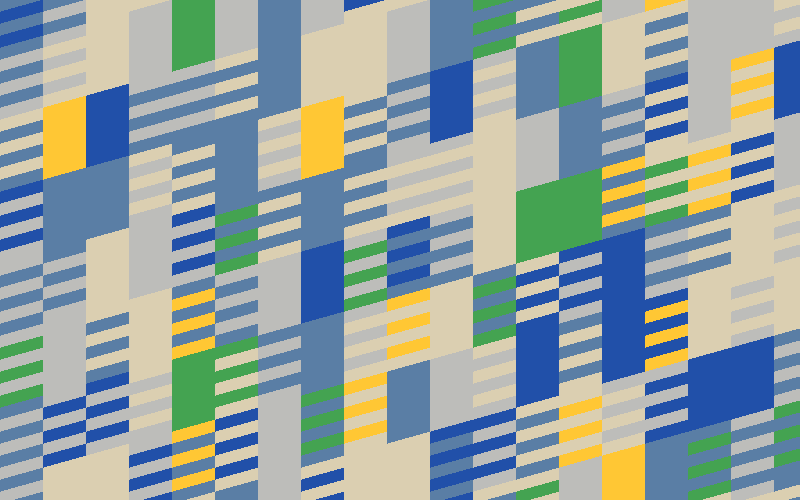

In [8]:
riley()

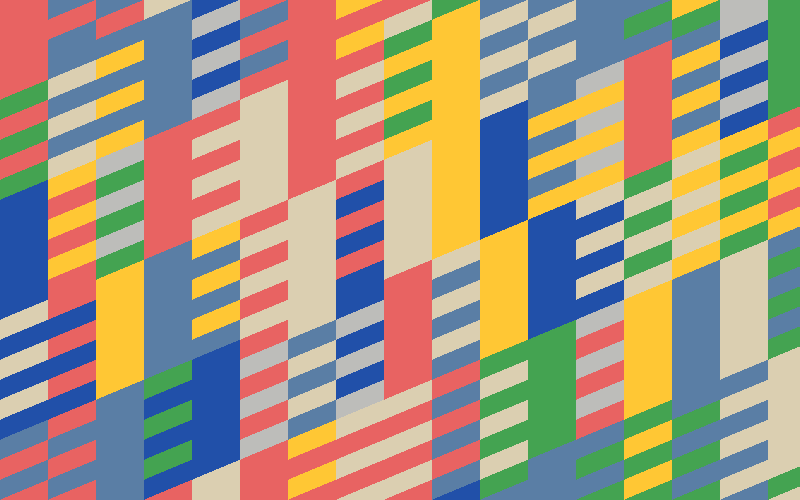

In [9]:
riley()

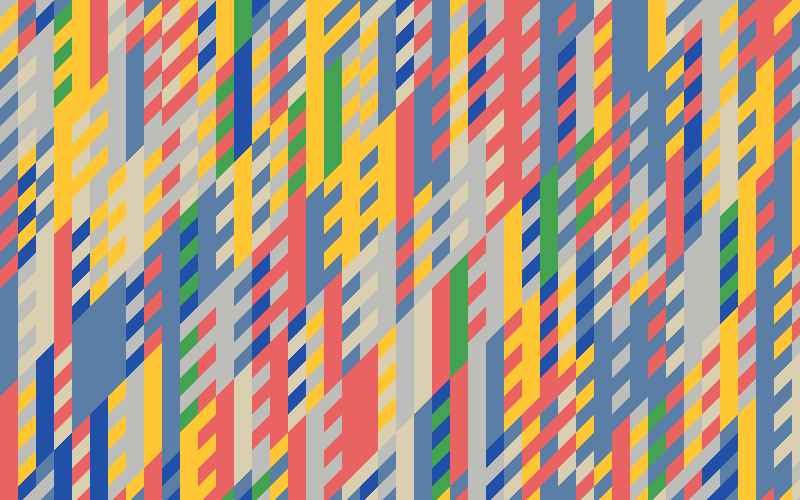

In [10]:
riley()

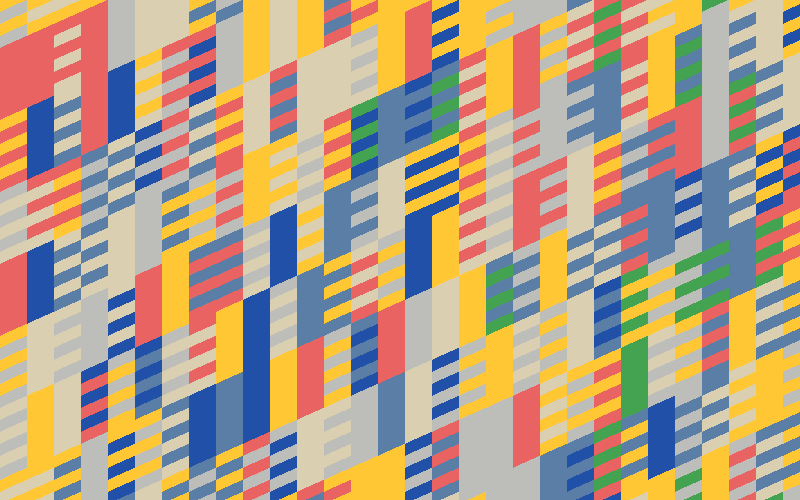

In [11]:
riley()

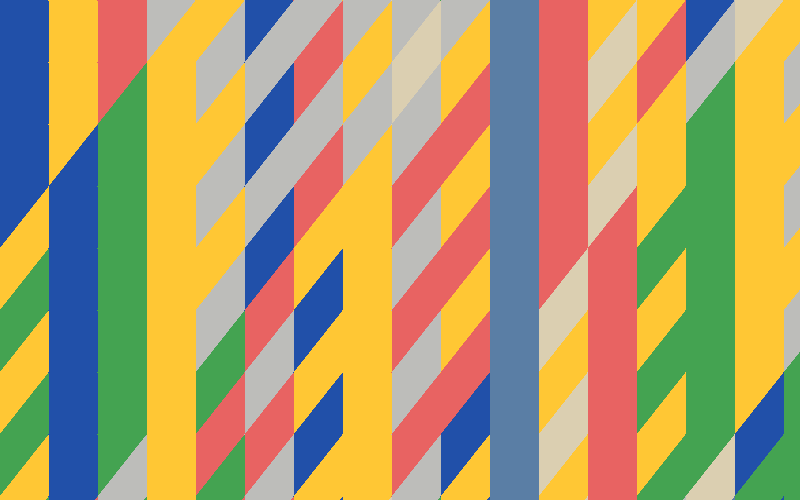

In [12]:
riley()

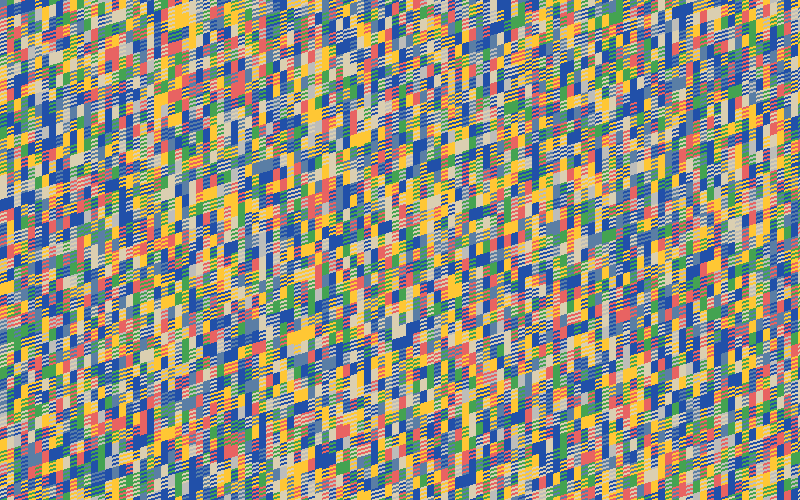

In [13]:
riley()